# Import the libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Data Exploration

In [2]:
#Loading data
# Import the data 
df_train = pd.read_csv('House_train.csv')

In [3]:
#Importing the test data
df_test=pd.read_csv('House_test.csv')

In [4]:
df_train.shape

(1168, 81)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [7]:
#Since we have one column less than the train set ie the target variable
df_test.shape

(292, 80)

In [8]:
#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

In [9]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [10]:
#To check on the datatype of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [12]:
#We have columns with null values which can be treated later

In [13]:
#To check for outliers using describe method for statistical analysis
df_train.describe(percentiles=[.25, .5, .75, .9])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
90%,120.000000,96.00000,14311.400000,8.000000,7.000000,2006.000000,2007.000000,320.000000,1070.300000,118.200000,...,261.300000,132.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,277650.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
#We can see some outliers in few columns like LotFrontage, LotArea, MaxVnrArea, etc. We will visualise it in a while during data cleaning

#Target variable is SalePrice

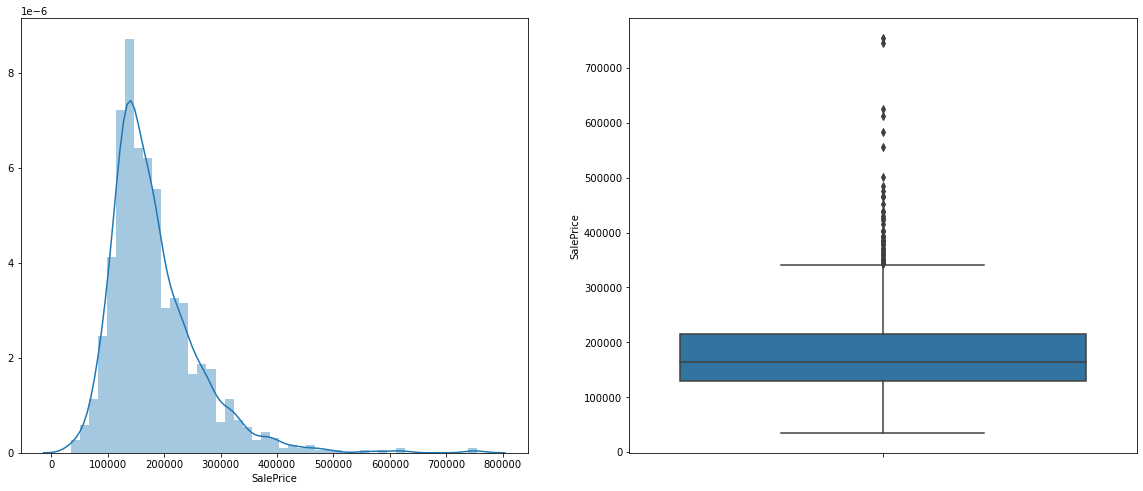

In [15]:
# saleprice distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice)

plt.subplot(1,2,2)
sns.boxplot(y=df_train.SalePrice)
plt.show()

In [16]:
#To check on the target variable distribution statistically
print(df_train.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.90,1]))

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
90%      277650.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Observations from the above visualisation and statistical distribution
1.SalePrice has a slight right-skewed distribution.
2.Most prices seem to be below 350,000

In [17]:
#Let us see the affect of log distribution of sale price

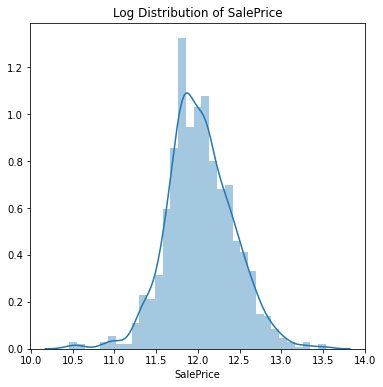

In [18]:
# log distribution of saleprice
plt.figure(figsize=(6,6))
sns.distplot(np.log(df_train['SalePrice']))
plt.title('Log Distribution of SalePrice')
plt.show()

In [19]:
#Now the graph is a normal curve .We will need to do this tranformation during data preparation before modelling

Data Cleaning

In [20]:
#Removing the unwanted columns.Since there are many columns ,lets drop the columns who have unique values and wont be useful in predictions

In [21]:
df_train.columns[df_train.nunique()==1]

Index(['Utilities'], dtype='object')

In [22]:
#count of unique elements in utilities
df_train.Utilities.nunique()

1

In [23]:
#Lets delete the column

del df_train['Utilities']

In [24]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,Inside,Mod,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,CulDSac,Gtl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [25]:
#Exhibiting the same change on test set
del df_test['Utilities']

Exploratory Data Analysis.
Univariate/Bivariate Analysis

In [26]:
#Getting the list of numerical variables
num_vars = df_train.select_dtypes(include=['float64','int64']).columns.tolist()
num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
#Get the list of categorical variables
cat_vars = df_train.select_dtypes(include=['object']).columns.tolist()
cat_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
#CORRELATION between numericalvariables

corr = df_train[num_vars].corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,-0.062403,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,...,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.002514,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065723,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


HEATMAP

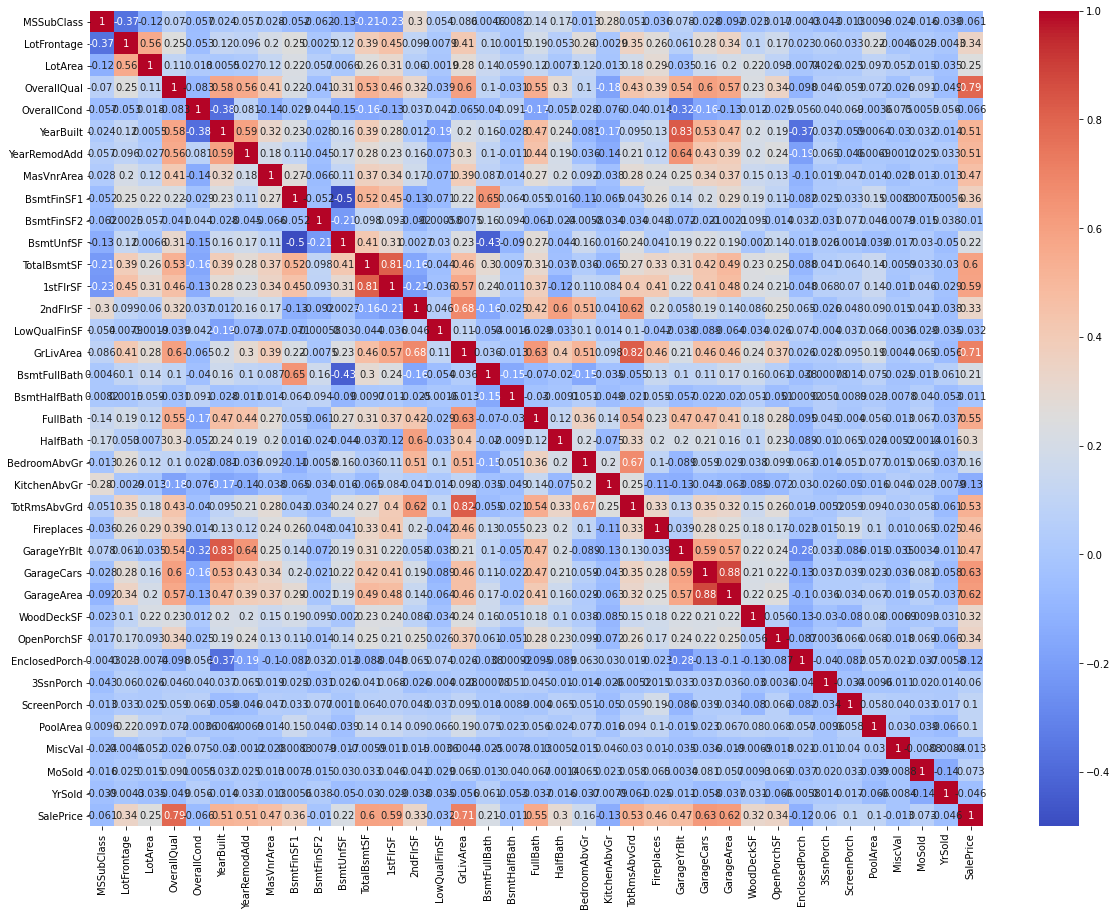

In [29]:
# plotting a heatmap
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [30]:
#Observations
#SalePrice has high correlation with some variables like OverallQual, GrLivArea, GarageCars, TotalBsmtSF.
#Besides, there is high correlation between some independent variables also like YearBuilt and GarageYrBlt, GrLivArea and TotRmsAbvGrd indicating presence of multicollinearity in the dataset

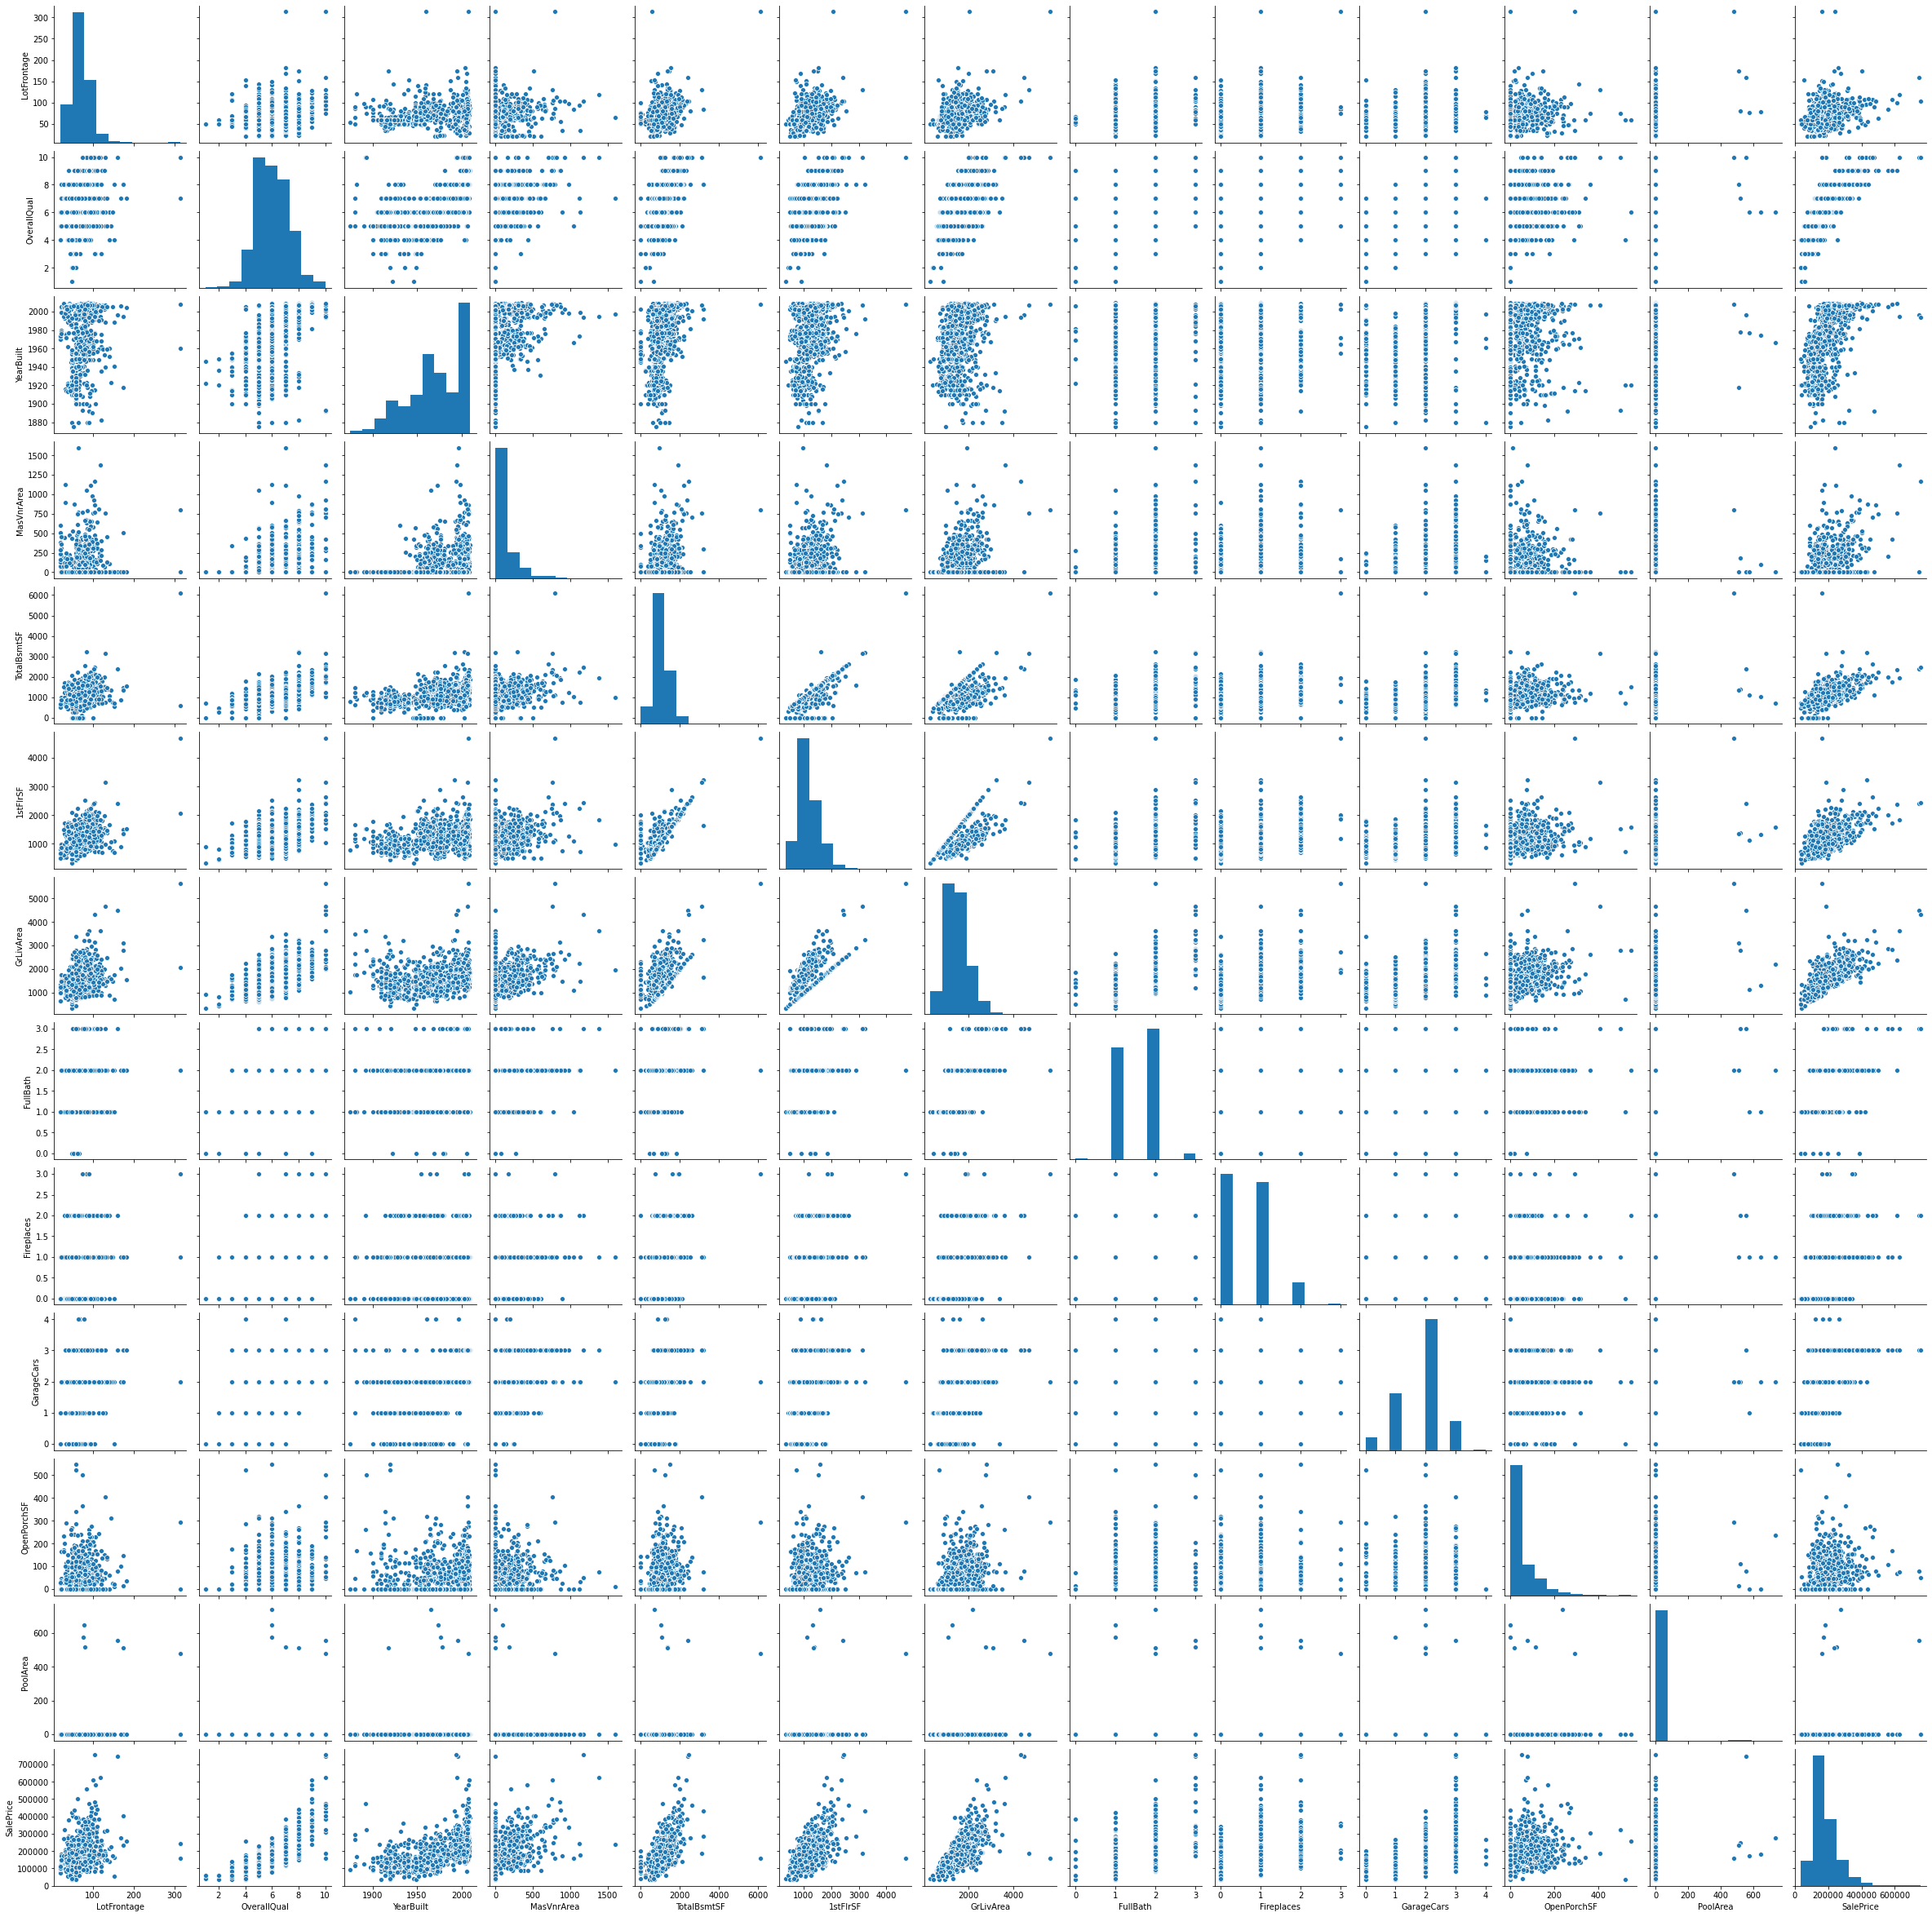

In [31]:
#creating pairplot of few selected important numerical variables based on their correlation values with sale price
sel_num_vars = ['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'OpenPorchSF', 'PoolArea', 'SalePrice']
sns.pairplot(df_train[sel_num_vars])
plt.show()

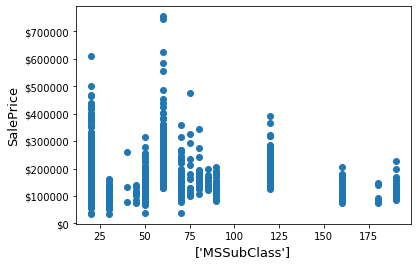

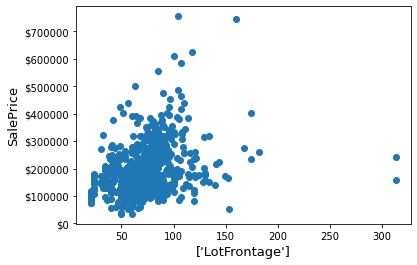

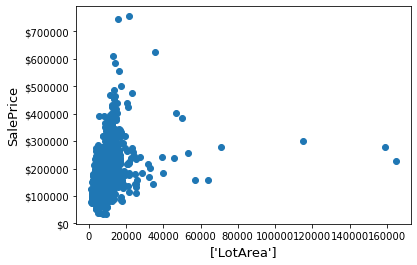

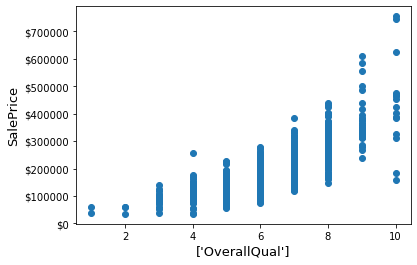

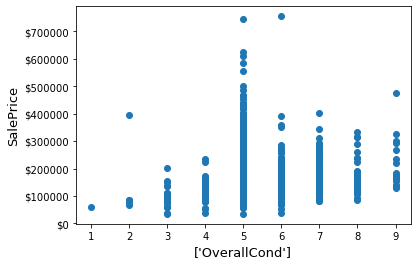

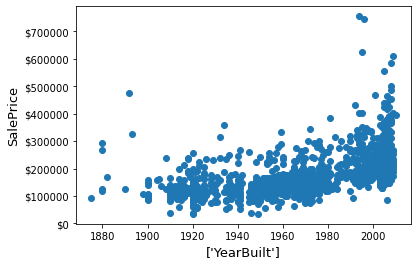

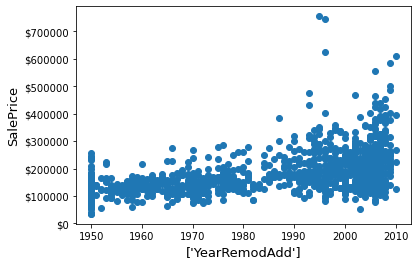

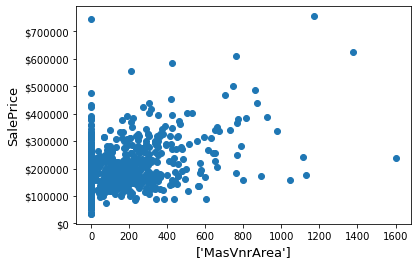

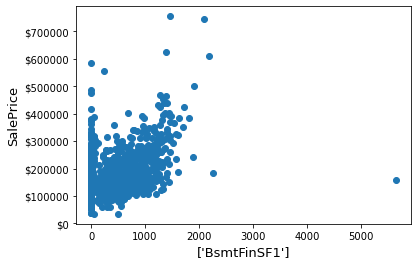

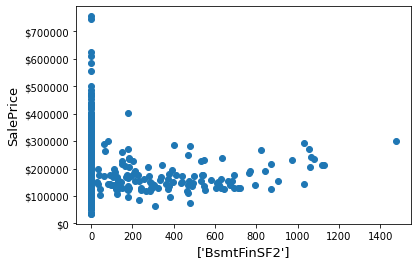

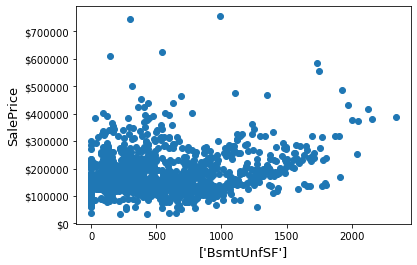

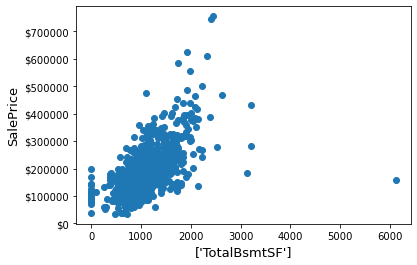

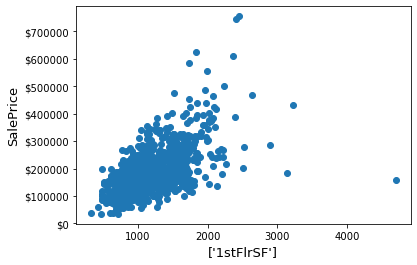

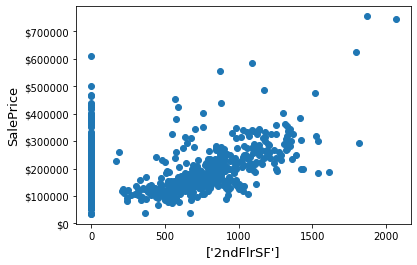

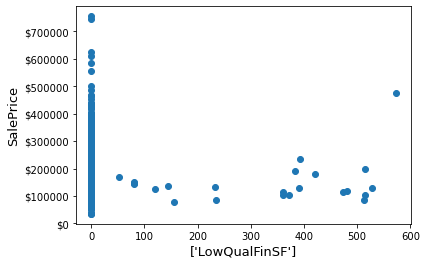

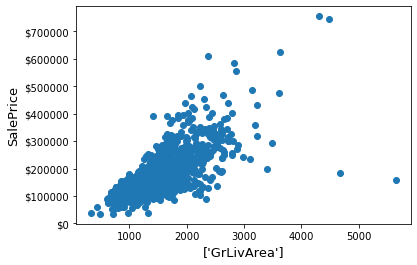

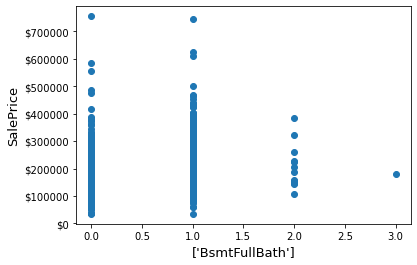

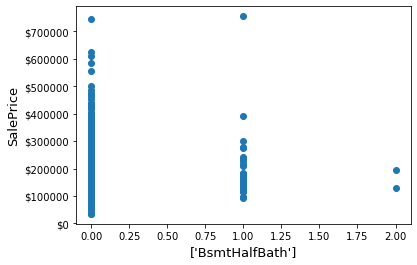

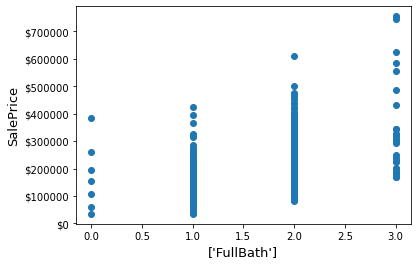

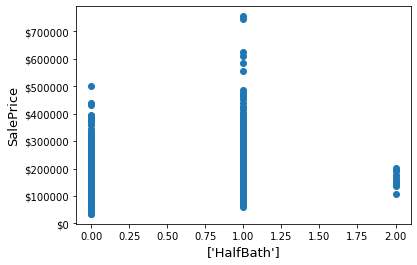

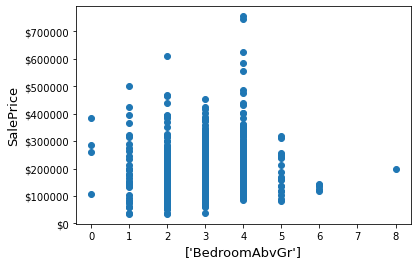

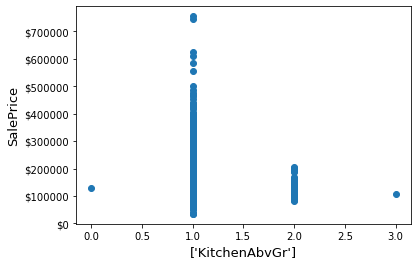

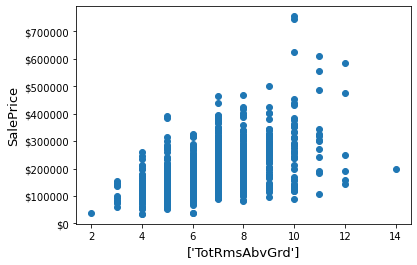

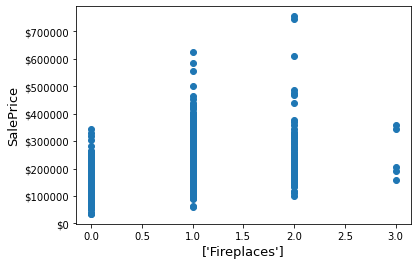

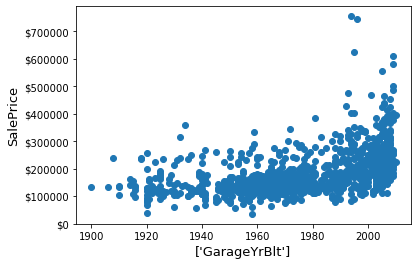

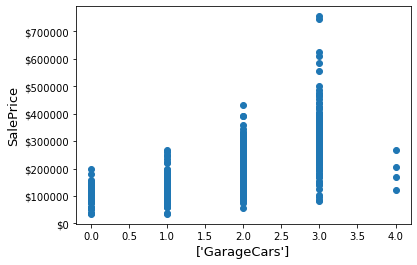

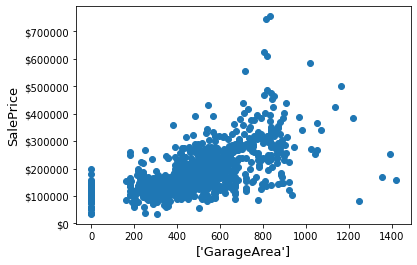

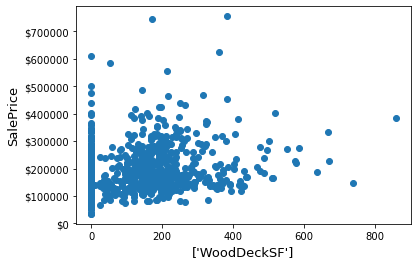

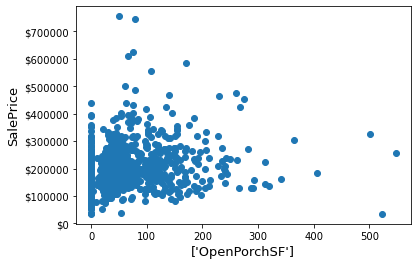

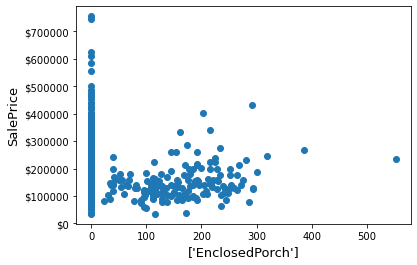

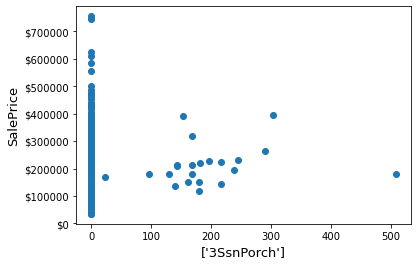

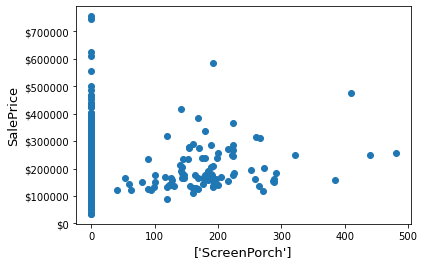

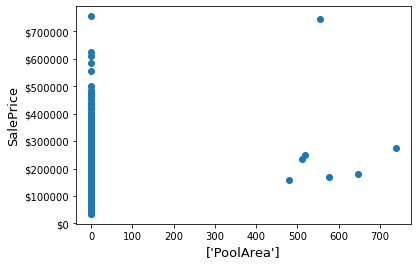

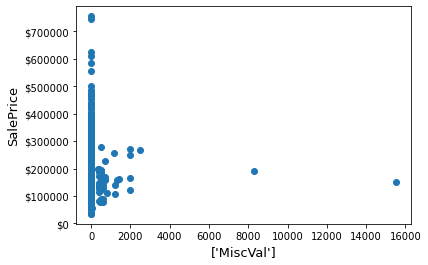

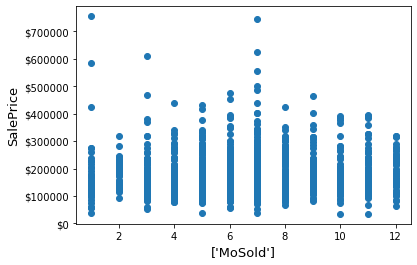

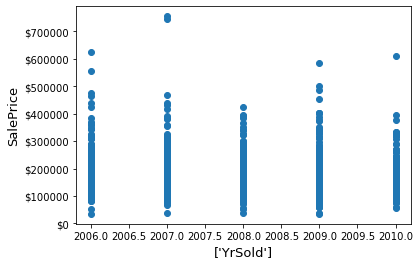

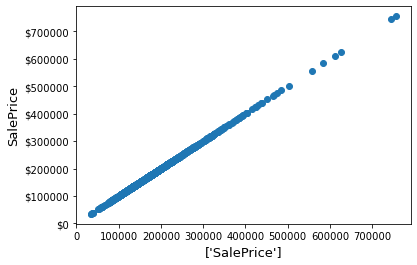

In [32]:
#Lets do a scatterplot for numerical variables as well
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%.0f')
numeric_features = df_train.select_dtypes(include=[np.number])

def scatterplots(col):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[col], y = df_train['SalePrice'])
    ax.grid(False)
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel([col], fontsize=13)
    plt.show()    
    
for columns in numeric_features:
    scatterplots(columns)

Based on scatterplot and correlation matrix, we can take certain decisions.

MSSub - It's technically a categorical variable. The average sale price is high for certain categories so this variable might be useful

LotFrontage - Doesn't look clearly associated with target variable

LotArea - Lot size in sq feet seems to be not correlated with the target variable.

OverallQual - Avg price increases with OverallQual and it's actually a categorical variable

OverallCond - Overall condition rating seems to be highly correlated with Sale Price and also correlated with other variables such as YearBuilt, YearRemodAdd for obvious reasons.

YearBuilt - Correlated with the target variable and other features and highly correlated with GarageYrBlt. We should use either one of them

YearRemodAdd - Shows some association with the target variable

MasVnrArea - 0.5 correlaion with target variable. We can park it for sometime and see how it affects ML algorithms

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF - Low correlation. TotalBsmtSF is highly correlated with 1stFlrSF but since the impact of 1stFlrSF on the target variable is more than TotalBsmtSF, we will keep it and drop the other.

1stFlrSF - Correlated with GrLivArea.

2ndFlrSF - Correlated with GrLivArea.

LowQualFinSF - Low correlation.

GrLivArea - Highly correlated with the target variable. There are oultliers in GrLivArea which should be deleted since this variable shows a strong replationship with target variable

BsmtFullBath and BsmtHalfBath - Low correlation

FullBath and HalfBath - Can be used to create new feature total bathrooms

BedroomAbvGr - Low impact on target variable

KitchenAbvGr - low correlation.

TotRmsAbvGrd - Total rooms above grade (does not include bathrooms) seems important

Fireplaces - Seems important so we will keep it

GarageYrBlt - It's correlated with YearBuilt

GarageCars - Correlated with GarageArea and is of low importance

GarageArea - Will keep this for further analysis

WoodDeckSF - Low correlation.

OpenPorchSF - Low correlation.

EnclosedPorch - Low correlation.

3SsnPorch - Low correlation.

ScreenPorch - Low correlation.

PoolArea - Low correlation.

MiscVal - Low correlation.

MoSold - Low correlation.

YrSold - Low correlation.

In [33]:
# There are oultliers in GrLivArea which should be deleted since this variable shows a strong replationship with target variable
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

Visualization of categorical variables

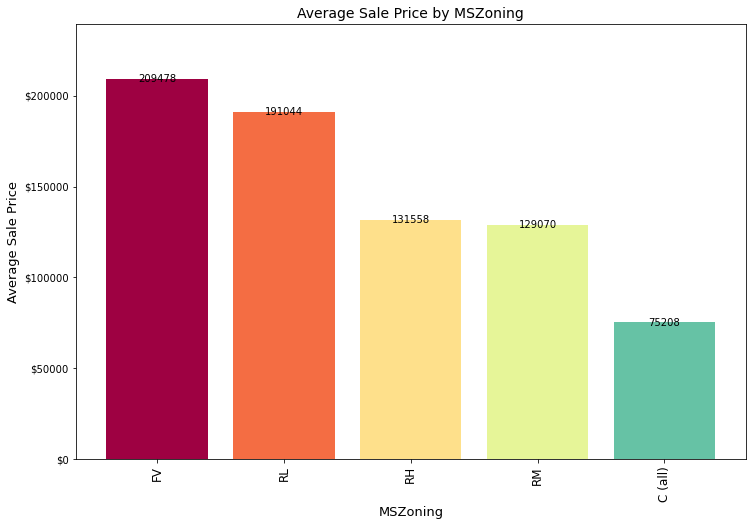

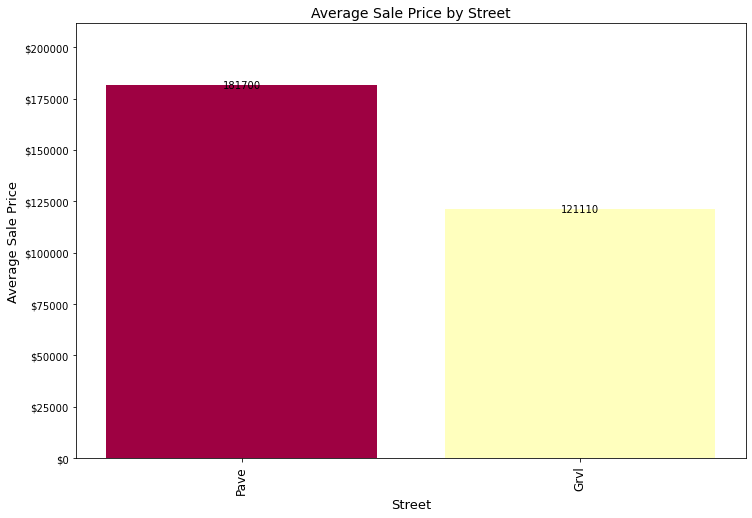

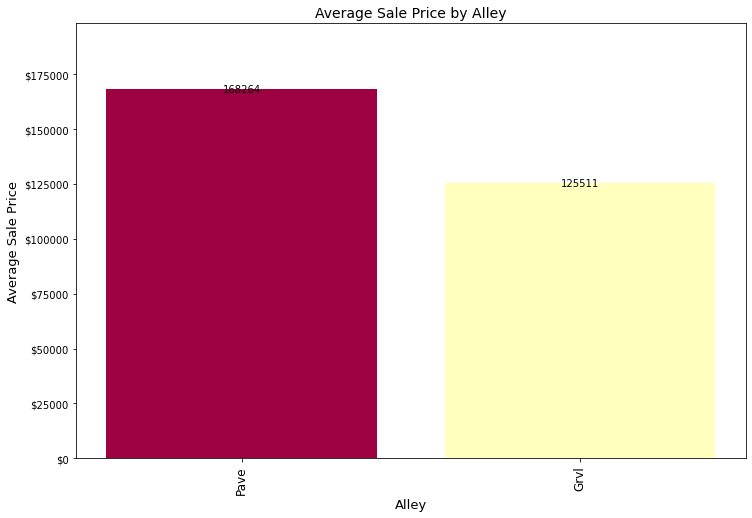

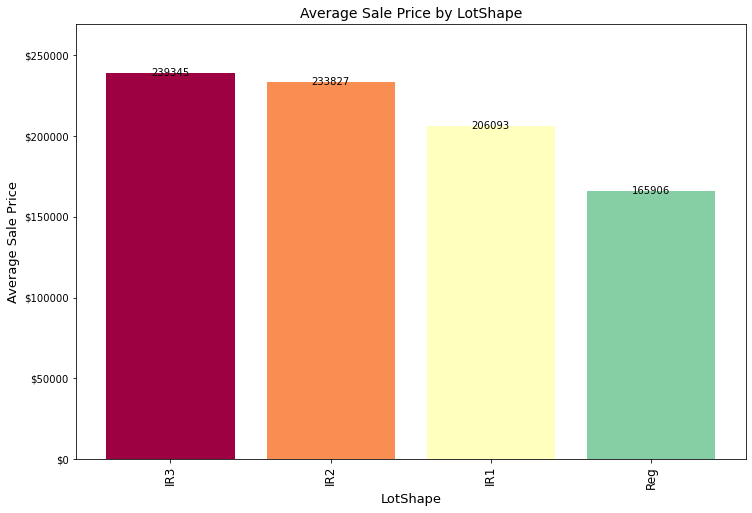

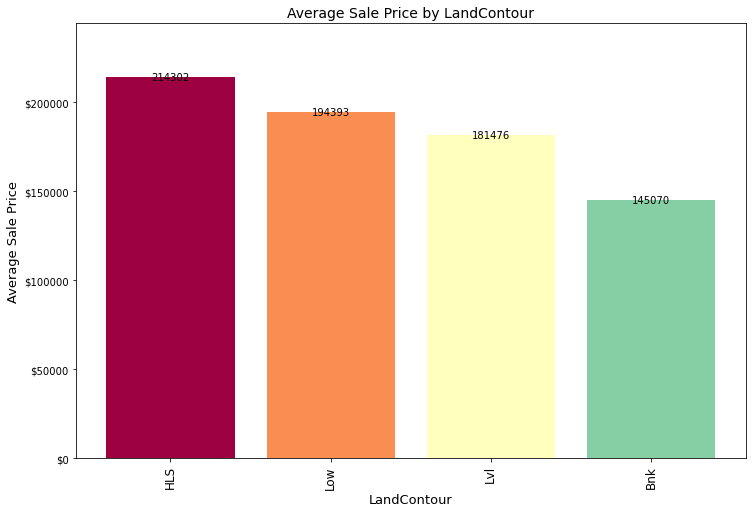

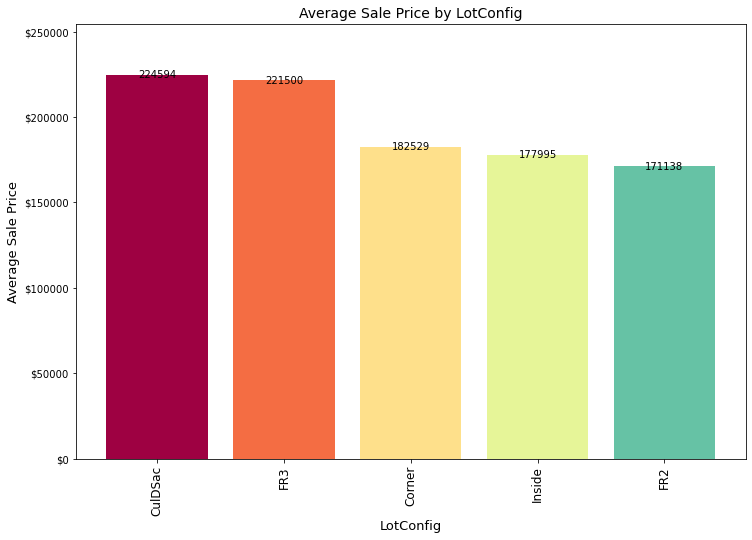

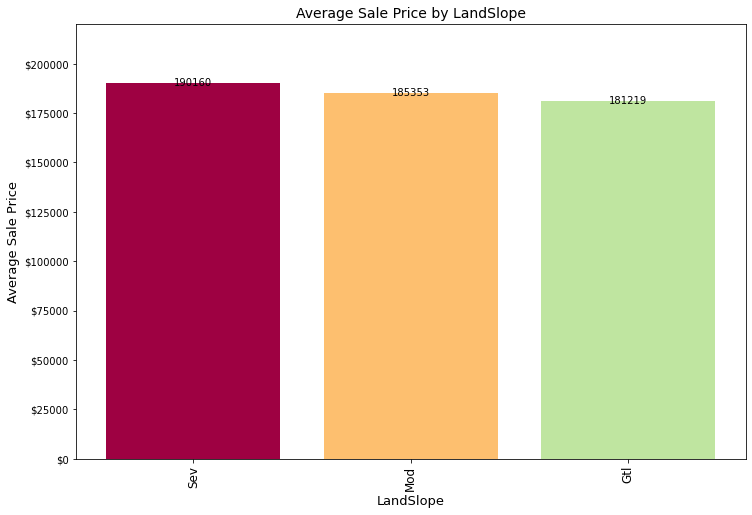

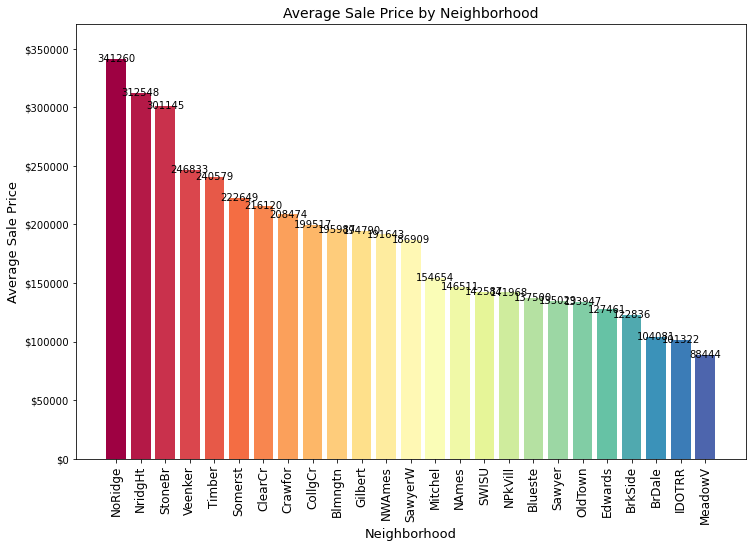

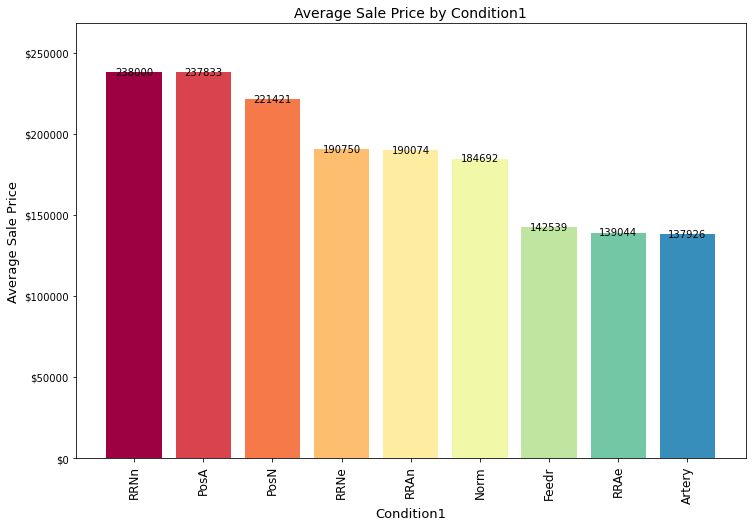

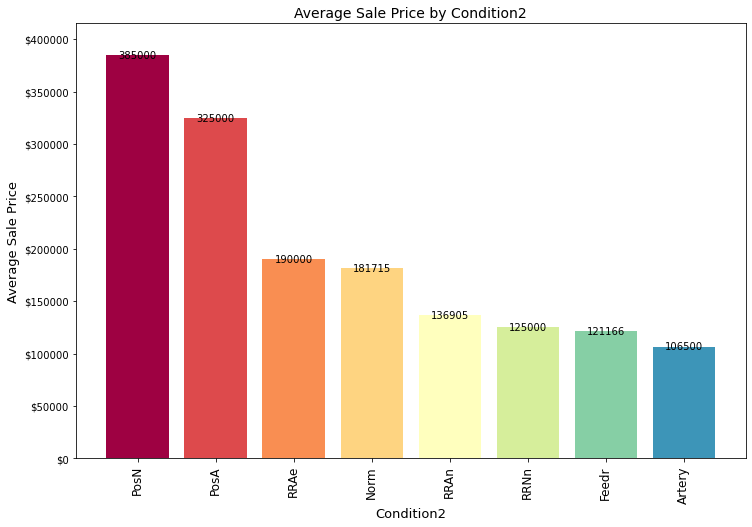

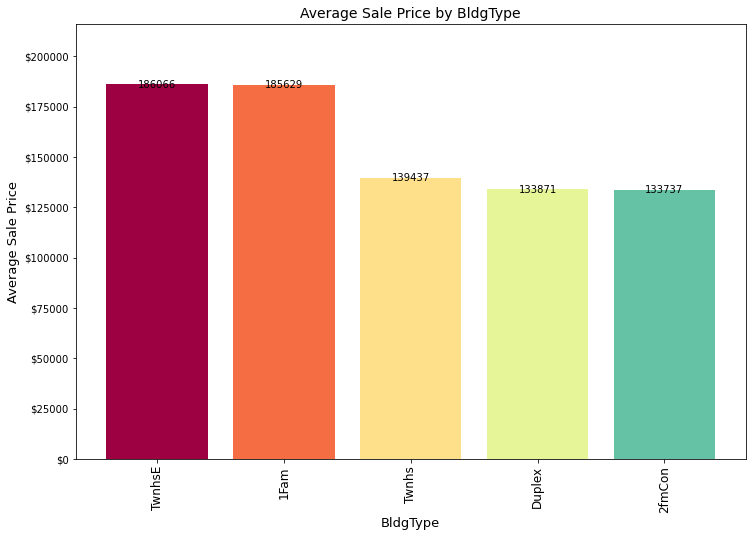

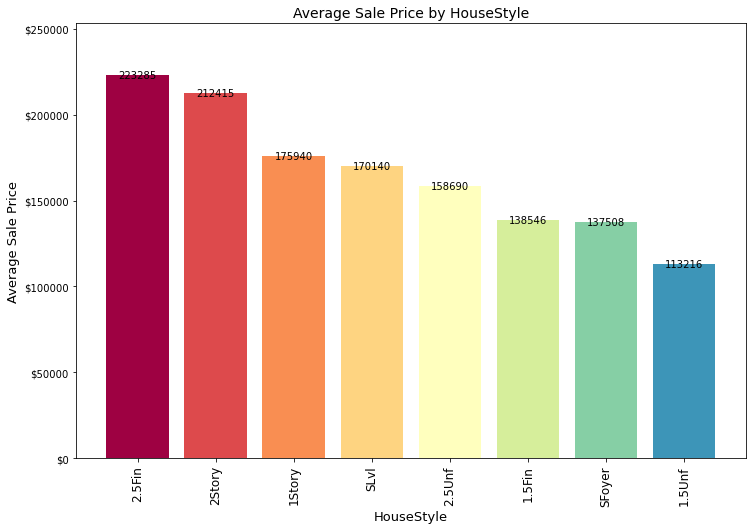

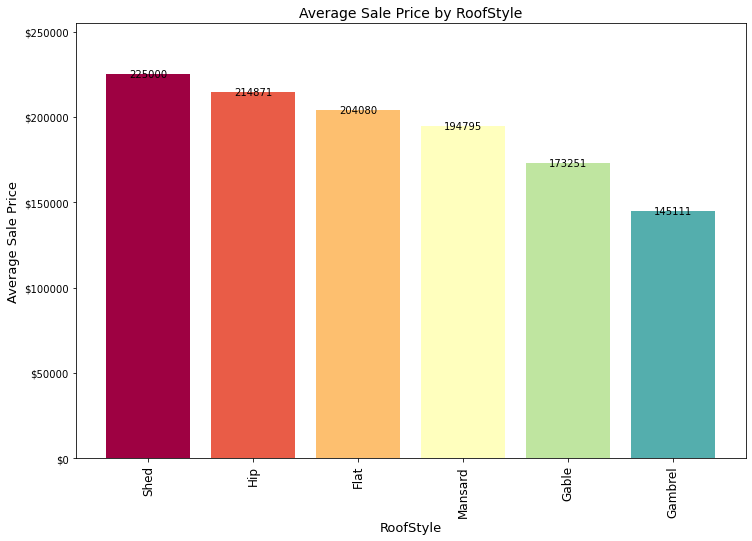

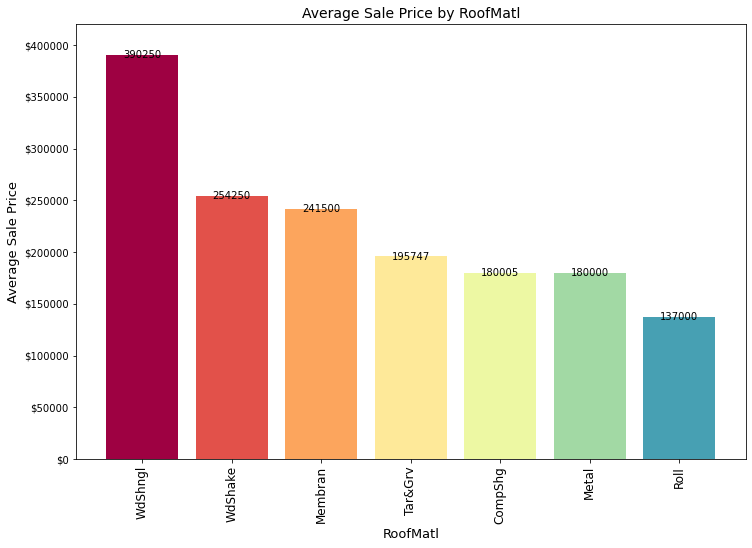

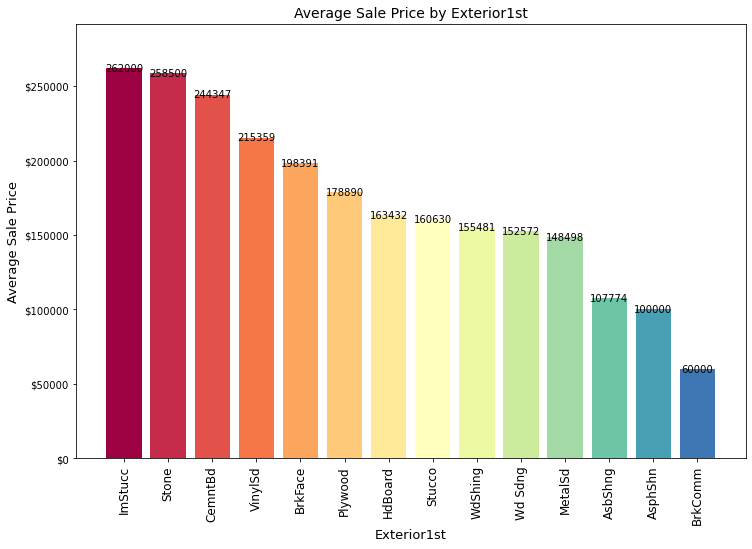

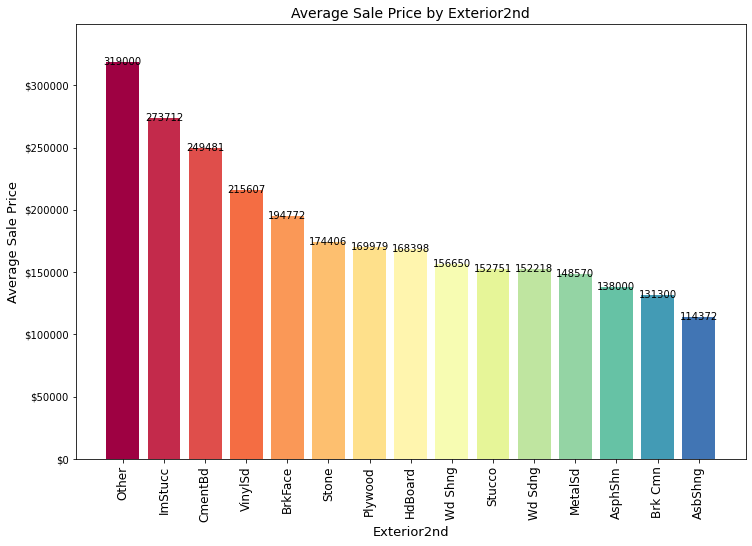

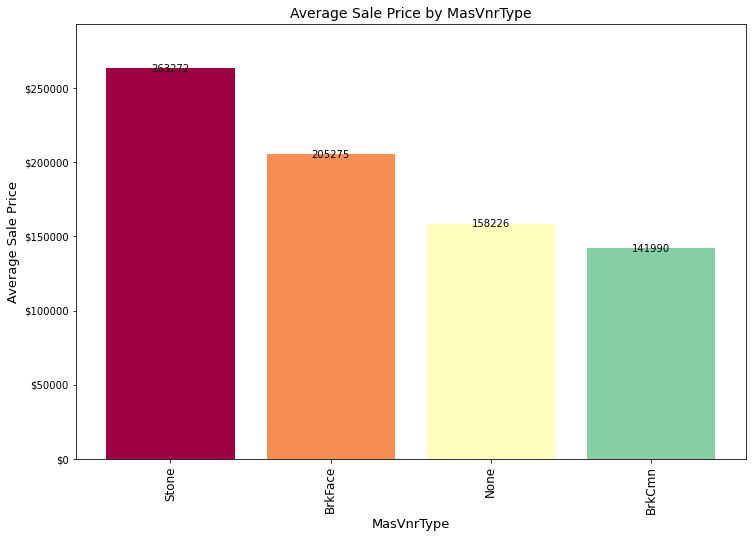

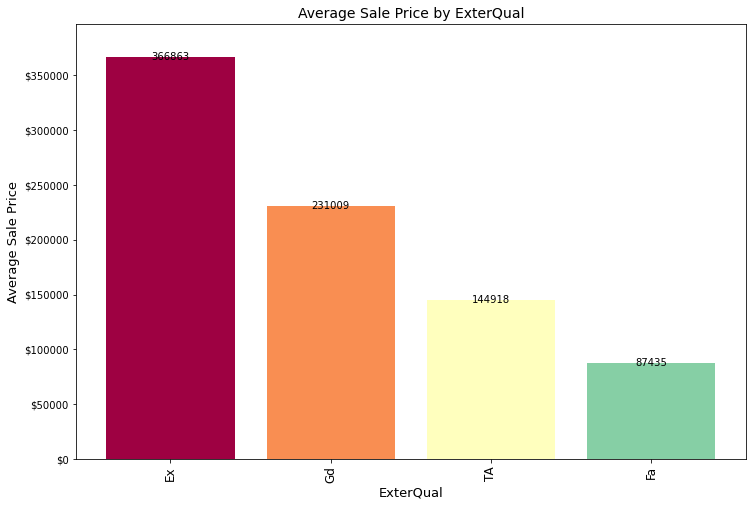

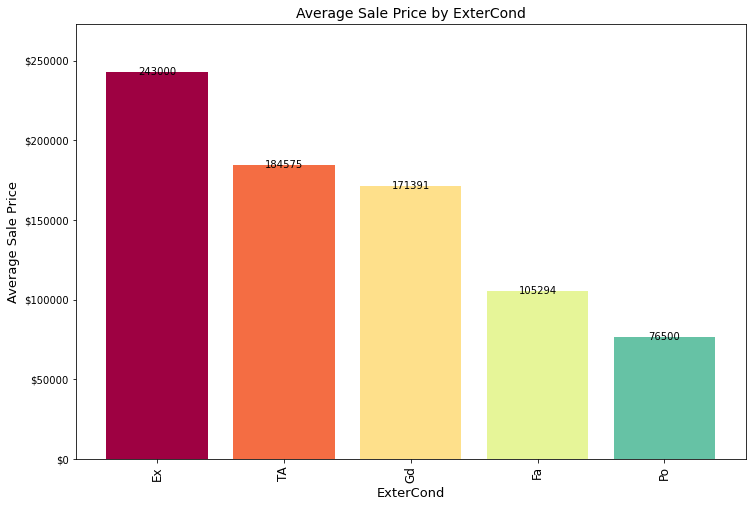

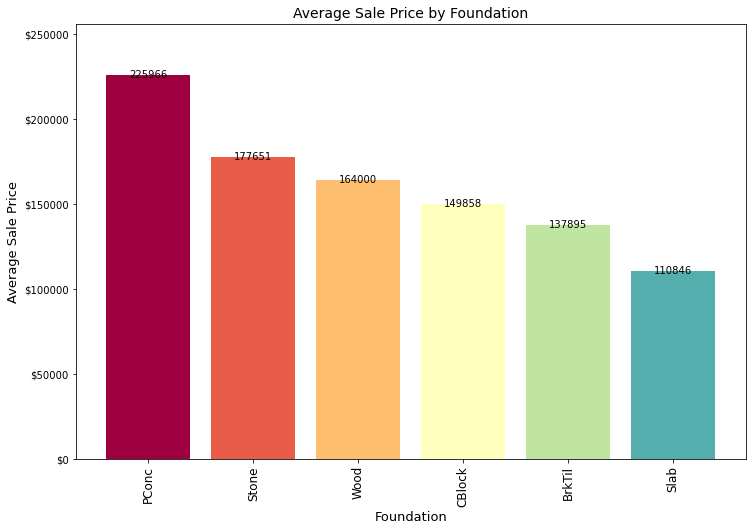

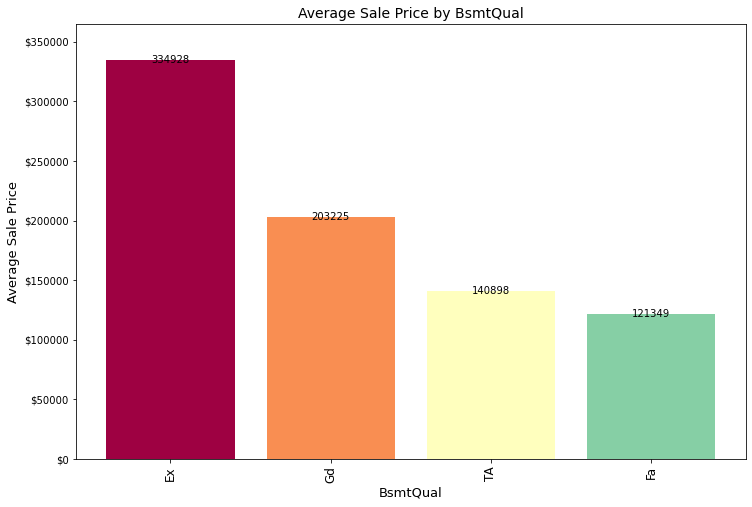

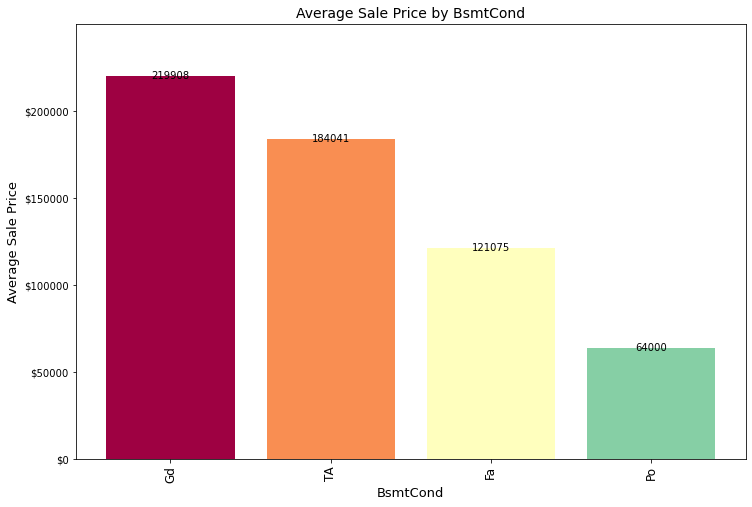

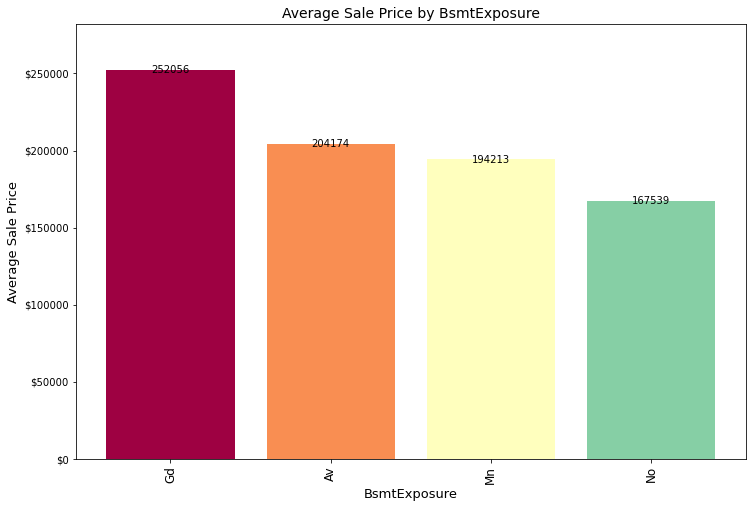

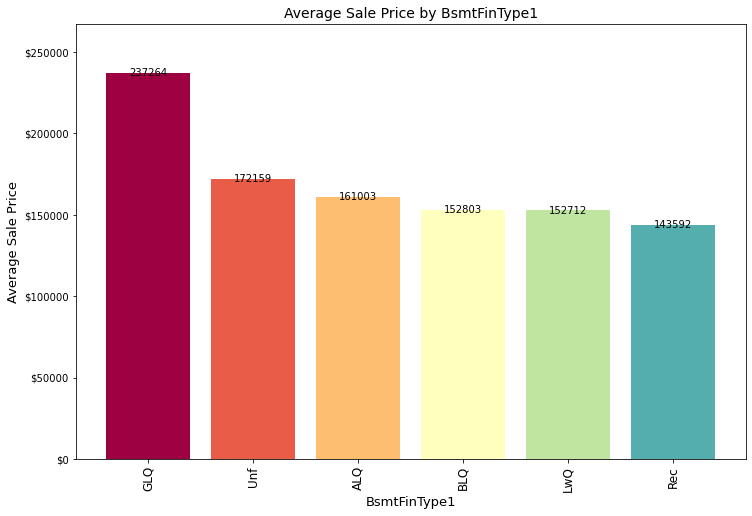

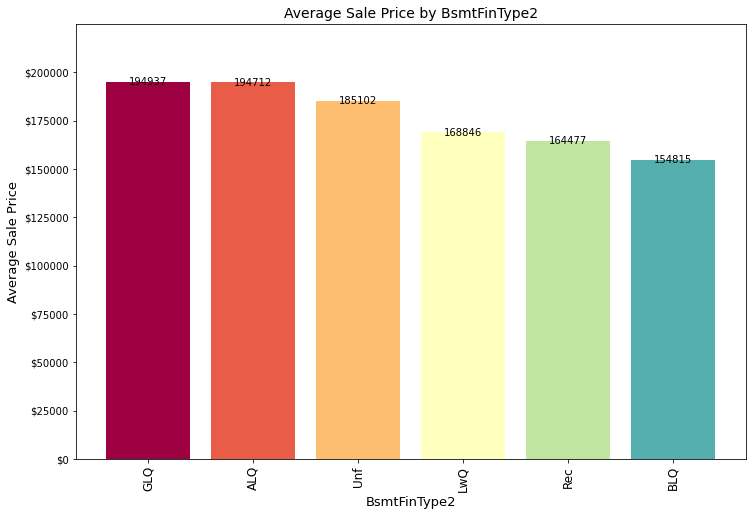

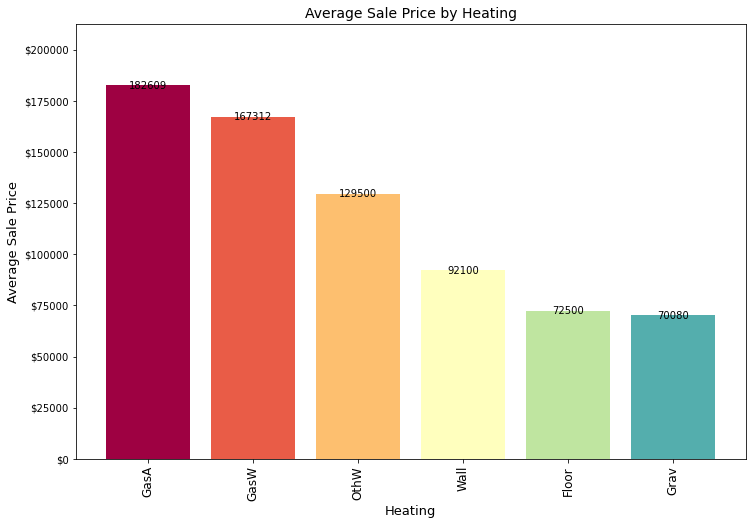

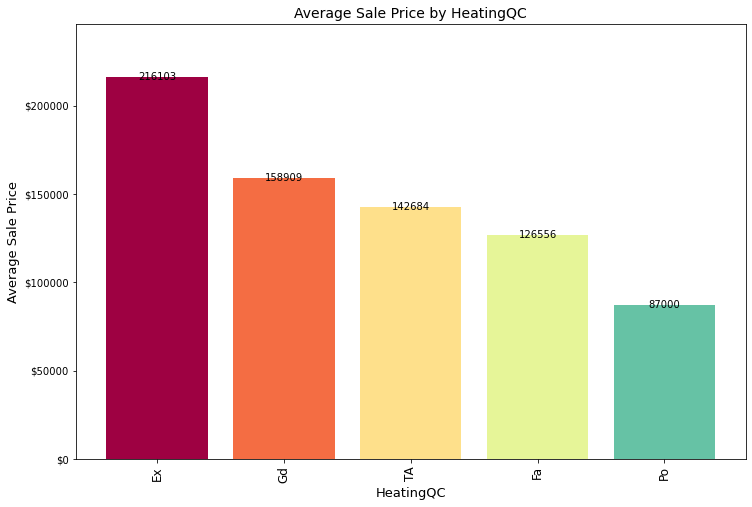

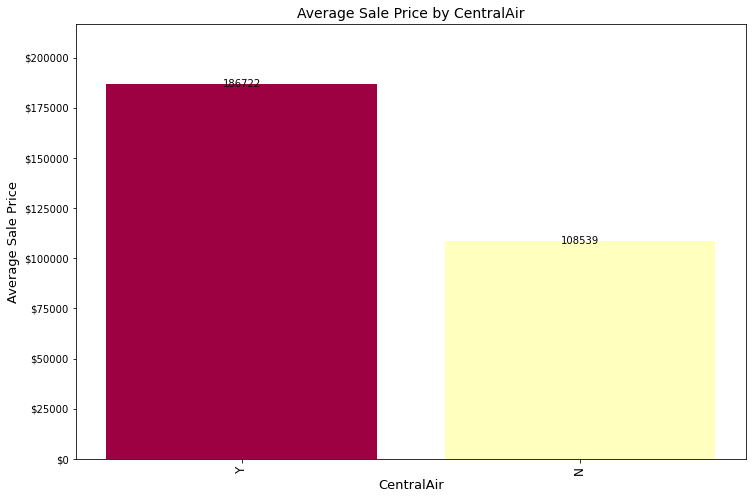

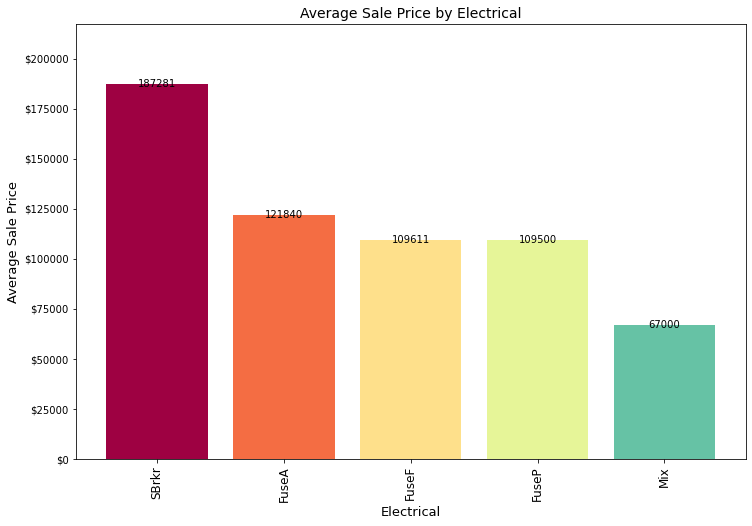

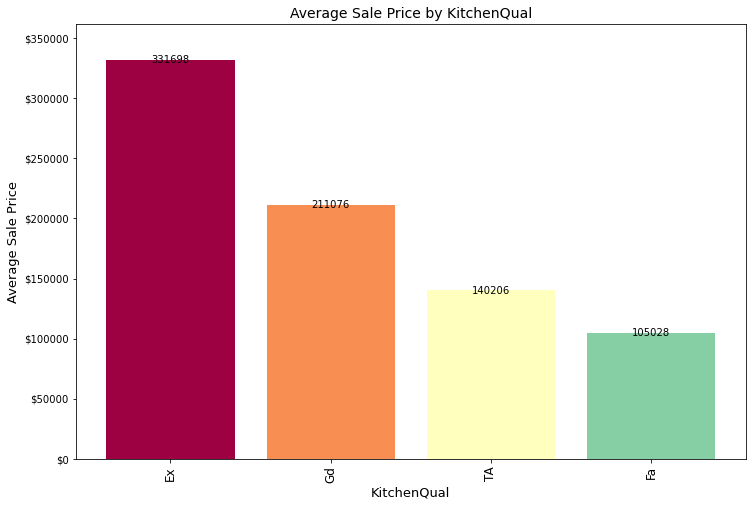

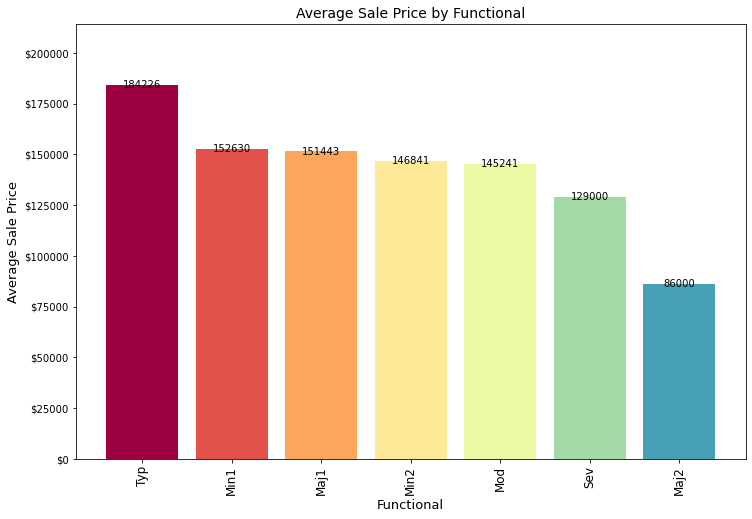

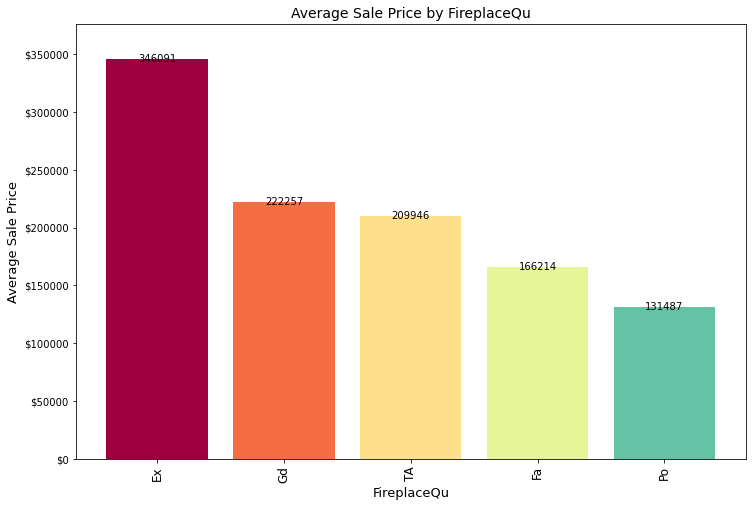

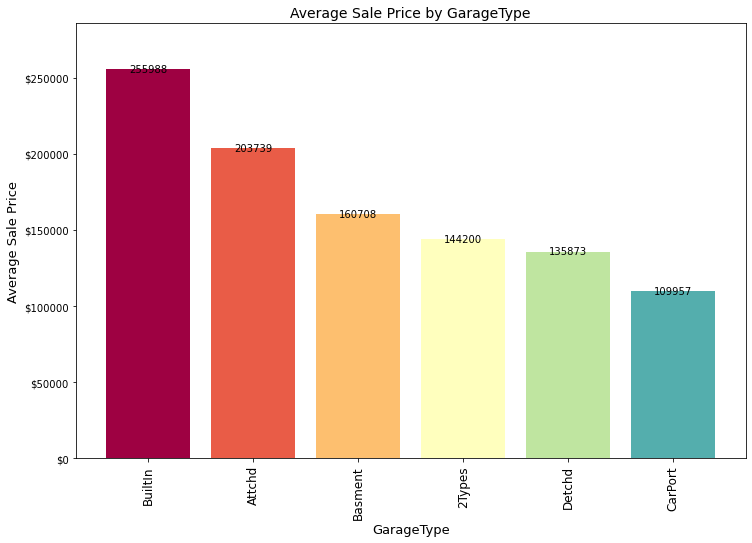

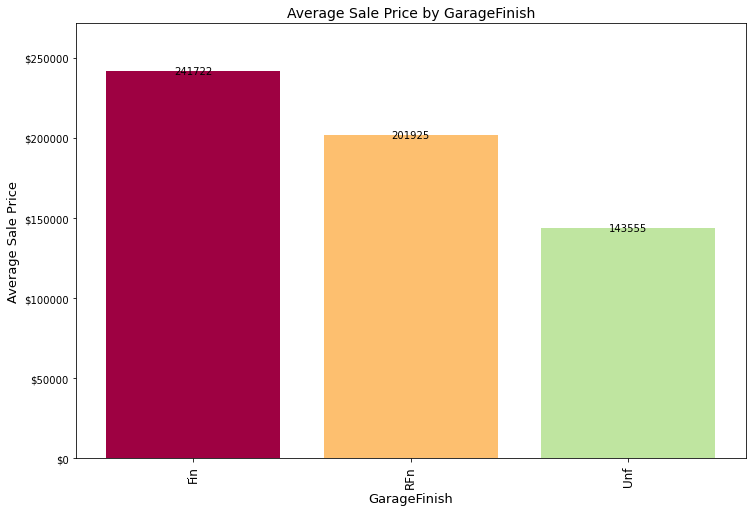

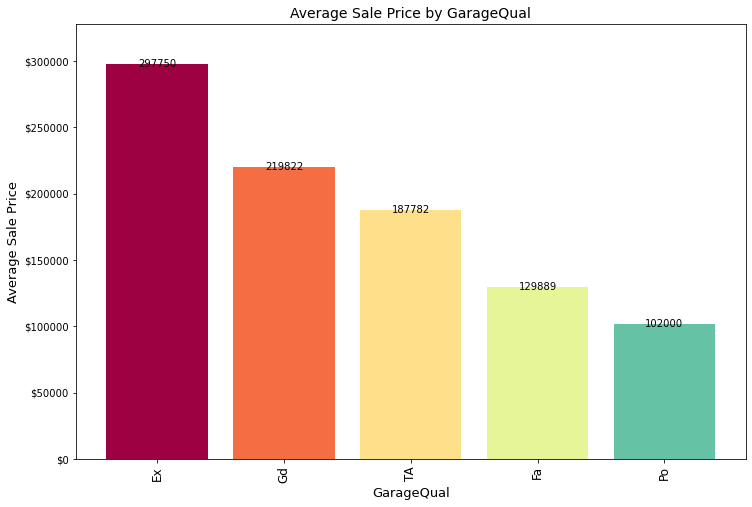

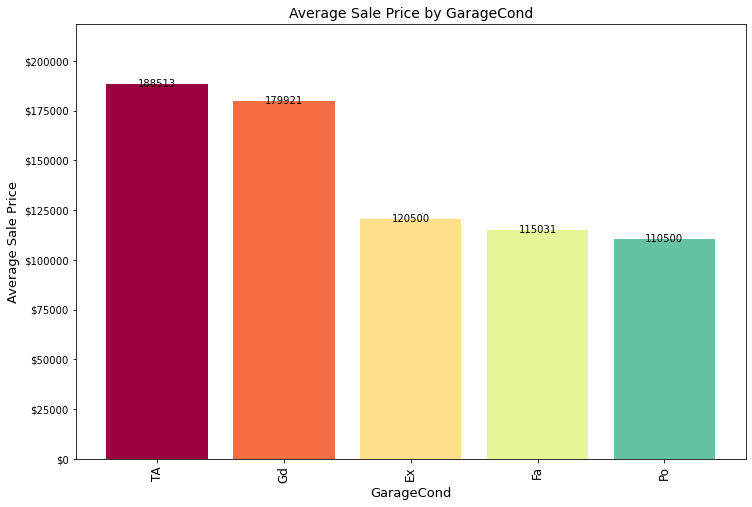

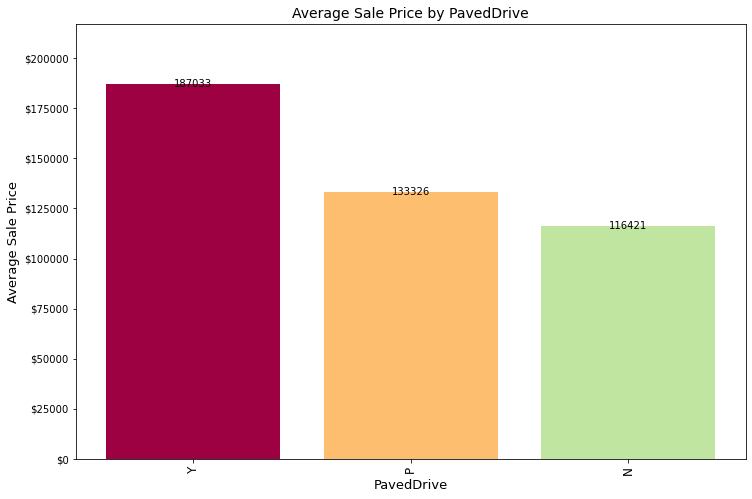

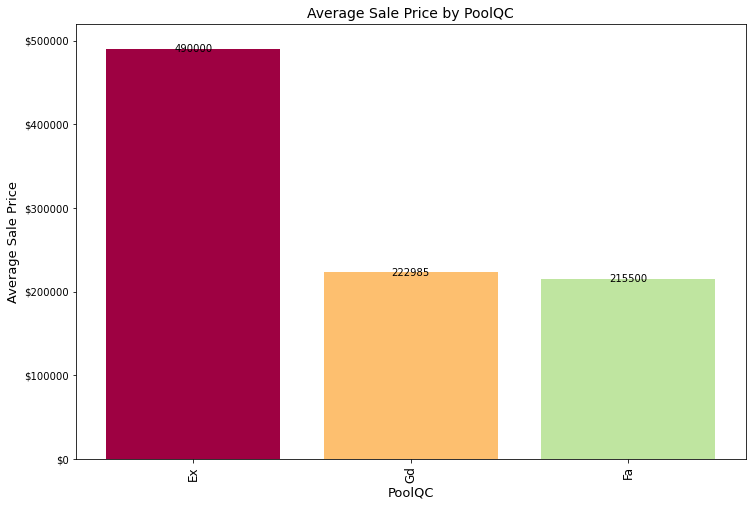

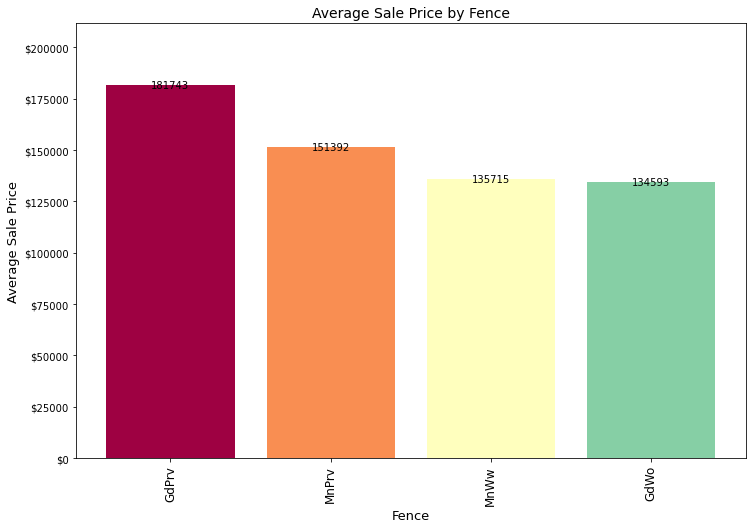

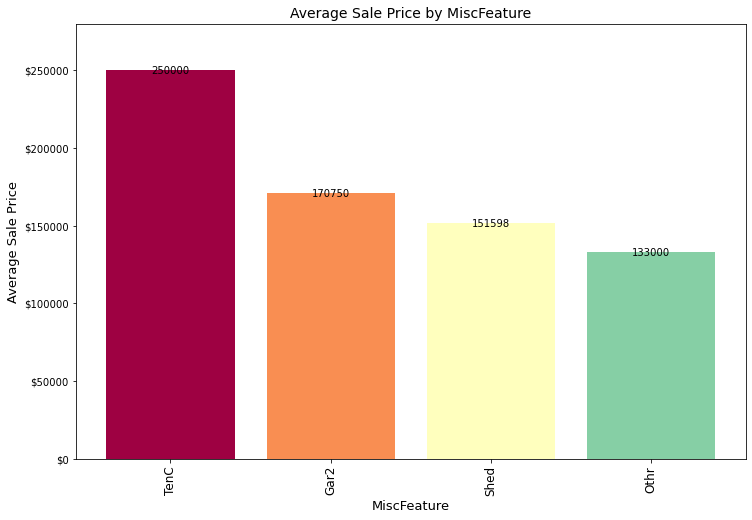

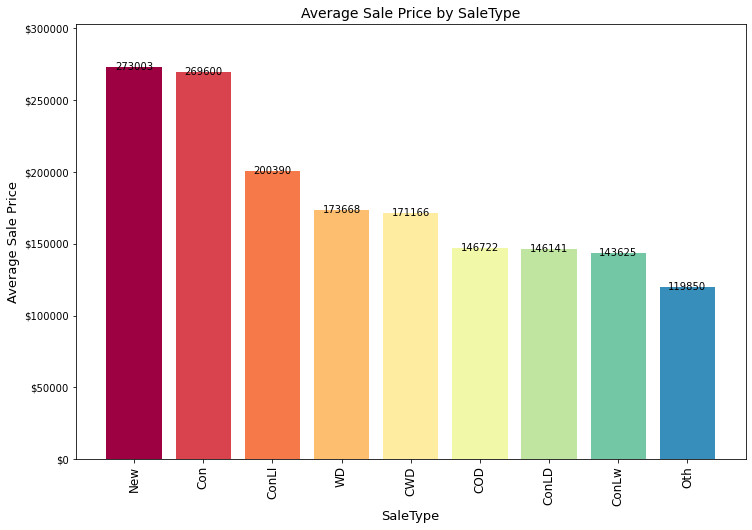

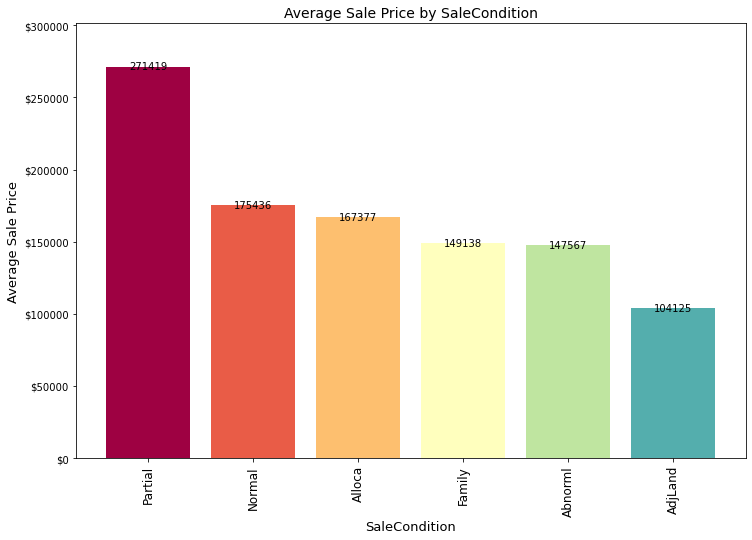

In [34]:

# Create a separate dateset with categorical variables
categorical_features = df_train.select_dtypes(include=[np.object])

import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%1.0f')

# Define a function to plot bar charts
def pivottabs(var):
    b=df_train[[var, 'SalePrice']].groupby([var], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
    b['SalePrice'] = b['SalePrice'].astype(int)
    c=b['SalePrice'].max() + 30000
    d = dict(zip(b[var], b['SalePrice']))

    colors = [plt.cm.Spectral(i/float(len(d.keys()))) for i in range(len(d.keys()))]

    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot()
    ax.bar(d.keys(), d.values(), color = colors)

    for k, v in d.items():
        ax.text(k, v+1, v, fontsize = 10, horizontalalignment='center', verticalalignment='center')

    ax.tick_params(axis='x',  labelsize = 12, labelrotation = 90)
    ax.set_ylim(0, c)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Average Sale Price', fontsize = 13)
    ax.set_xlabel(var, fontsize=13)
    ax.set_title("Average Sale Price by "+ var, fontsize = 14)
    
# call the function for each categorical variable 
for columns in categorical_features:
    pivottabs(columns)


Observations from categorical variable

MSZoning - This represents the general zoning classification. The average sale price for FV and RL zones is higher than in other zones.

Alley - Alley represents the type of Alley access. Can we say that access to paved Alley would fetch you a better price for your property? We can't be so sure since more than 90% of values for this field are missing.

LotShape - Lotshape is the general shape of the property. It seems 'IR2' is the most preferred one.

LandContour - It represents flatness of the property. Though there is not a huge difference in average prices, 'HLS' seems to be preferred one.

Utilities - It's evident that certain type (AllPub) of utilities is preferred over other.

LotConfig - It represents lot configuration. We do see LotConfig affecting the average sale price.

LandSlope - The slope of the property seems to be slightly related.

Neighborhood - Highly related to Sale Price. We can clearly see that certain neighborhoods are preferred by buyers.

Condition1 & Condition2 - These variables represent proximity to the main road or railroad and we can observe sale price varying by conditions.

BldgType - The average price for '1Fam' and 'twnhsE' type of dwelling is better than the other 3 dwelling types.

HouseStyle - It represents the style of the dwelling and it appears that '2.5In' and '2Story' dwelling styles affect the sale price.  

RoofStyle and RoofMatl - RoofStyle and RoofMatl represent the type of roof and roof material respectively. It's evident that average prices for 'Shed' and 'Hip' roof-style and 'Wood Shingle' roof material impact sale price majorly.

Exterior1st and Exterior2nd - These 2 variables reflect exterior covering on the house and we can clearly notice some pattern there.

MasVnrType - 'Stone' is the preferred masonry veneer type.

ExterQual and ExterCond - These variables are all about the quality of the exterior material and present condition of the same. As we can see in bar charts, the exterior quality and present condition of exterior material makes a lot of difference to the average sale price Foundation - Dwellings with 'PConc' foundation type fetch better average sale price. It seems 'Pconc' stands for concrete. 

Observations - categorical variables
MSZoning - This represents the general zoning classification. The average sale price for FV and RL zones is higher than in other zones.

Alley - Alley represents the type of Alley access. Can we say that access to paved Alley would fetch you a better price for your property? We can't be so sure since more than 90% of values for this field are missing.

LotShape - Lotshape is the general shape of the property. It seems 'IR2' is the most preferred one.

LandContour - It represents flatness of the property. Though there is not a huge difference in average prices, 'HLS' seems to be preferred one.

Utilities - It's evident that certain type (AllPub) of utilities is preferred over other.

LotConfig - It represents lot configuration. We do see LotConfig affecting the average sale price.

LandSlope - The slope of the property seems to be slightly related.

Neighborhood - Highly related to Sale Price. We can clearly see that certain neighborhoods are preferred by buyers.

Condition1 & Condition2 - These variables represent proximity to the main road or railroad and we can observe sale price varying by conditions.

BldgType - The average price for '1Fam' and 'twnhsE' type of dwelling is better than the other 3 dwelling types.

HouseStyle - It represents the style of the dwelling and it appears that '2.5In' and '2Story' dwelling styles affect the sale price.  

RoofStyle and RoofMatl - RoofStyle and RoofMatl represent the type of roof and roof material respectively. It's evident that average prices for 'Shed' and 'Hip' roof-style and 'Wood Shingle' roof material impact sale price majorly.

Exterior1st and Exterior2nd - These 2 variables reflect exterior covering on the house and we can clearly notice some pattern there.

MasVnrType - 'Stone' is the preferred masonry veneer type.

ExterQual and ExterCond - These variables are all about the quality of the exterior material and present condition of the same. As we can see in bar charts, the exterior quality and present condition of exterior material makes a lot of difference to the average sale price Foundation - Dwellings with 'PConc' foundation type fetch better average sale price. It seems 'Pconc' stands for concrete. 

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - These basement specific variables are about the quality and condition of the basement. Heating - Gas heating seems to be the most preferred one and heated floors are not that popular.

HeatingQC - Excellent heating quality and condition show better average pricing.

CentralAir - Availability of a central air conditioning system makes a property costlier.

Electrical - 'SBrKr' type of electrical system seems to be important.

KitchenQual - 'Excellent' Kitchen quality represents the overall condition of the property. A house with a good quality kitchen is expected to be costlier.

Functional - 'Typ' home functionality rating is the preferred rating by home buyers. 

FireplaceQu - It indicates quality of the fireplace. Almost 47% of the observations are missing for this variable.

GarageType, GarageFinish, GarageQual, and GarageCond - These factors represent the garage location, finish, overall quality, and condition of the garage.  PavedDrive - Paved driveway impacts the average prices.

PoolQC - It represents the condition of the pool if present. 99.5% properties do not have a pool

Fence - Fence quality. 80% of the observations are missing. 

MiscFeature -  Miscellaneous feature not covered in other categories. 96% of the observations are missing.

SaleType - 9 categories of sale type. Properties with category 'New' fetched the highest average price.

SaleCondition - Represents the condition of the sale.

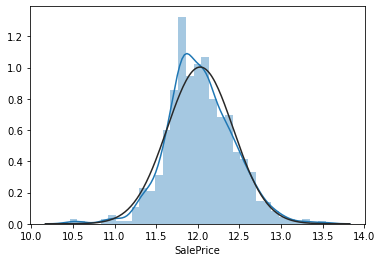

In [35]:
#As we had seen that the target variable is salesprice and it showed right skewed distribution,lets do the lof transformation of target variable
from scipy.stats import norm
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

In [36]:
#The skew seems now corrected and the data appears more normally distributed

let's first concatenate the train and test data in the same dataframe and carry out the data preprocessing steps

In [37]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1458, 78)


Handling missing values

In [38]:
#To Find out the columns with null values 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageType,5.555556
GarageFinish,5.555556
GarageQual,5.555556


Impute Missing Values

Let's impute the missing values -

Starting with variables which can be imputed with 'None'

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
MiscFeature : data description says NA means "no misc feature"
Alley : data description says NA means "no alley access"
Fence : data description says NA means "no fence"
FireplaceQu : data description says NA means "no fireplace"
GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
MasVnrType : NA most likely means no masonry veneer for these houses. We can fill None for the type.
MSSubClass : Na most likely means No building class. We can replace missing values with None

In [39]:
for col in ('PoolQC','MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [40]:
#Importing with median values
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [41]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#Imputing the below features with 0
GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage)
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [42]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

Features imputed with Mean modes
MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
SaleType : Fill in again with most frequent which is "WD"

In [43]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

Functional : data description says NA means typical

In [44]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [45]:
#To figure out if there is any other missing value for validation

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [46]:
#Transforming few numerical variables which appear to be categorical above

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [47]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['GrLivArea'] + all_data['GarageArea']
all_data['Bathrooms'] = all_data['FullBath'] + all_data['HalfBath']*0.5

Treating Skewed features

In [48]:
from scipy import stats
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 34 skewed numerical features to Box Cox transform


Outlier Treatment

In [50]:
all_data.describe(percentiles = [0.25,0.50,0.75,0.90,.99])

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,Bathrooms
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,5.893654,19.549362,2.255381,14.137267,14.158917,3.257785,7.072485,1.053186,9.389147,11.885798,...,9.562921,3.720590,3.245249,1.039697,0.130908,0.623453,0.043968,0.403392,16.775461,1.067373
std,0.591753,2.027112,0.267279,0.047974,0.032545,4.119919,5.134467,2.997324,3.388423,2.158199,...,2.493755,3.982099,3.102256,2.588229,1.023167,2.136031,0.684557,2.152097,1.062256,0.274007
min,3.932510,12.878993,0.730463,13.977122,14.103852,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.023123,0.000000
25%,5.684507,18.775958,2.055642,14.110234,14.130899,0.000000,0.000000,0.000000,8.345589,11.491255,...,9.261867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.058026,0.730463
50%,5.968981,19.660401,2.259674,14.139607,14.173451,0.000000,9.603364,0.000000,10.155842,12.099929,...,10.166380,0.000000,4.169586,0.000000,0.000000,0.000000,0.000000,0.000000,16.785442,1.194318
75%,6.221214,20.471659,2.440268,14.182841,14.189087,7.669478,11.189185,0.000000,11.534575,12.871661,...,10.634887,7.724359,5.914940,0.000000,0.000000,0.000000,0.000000,0.000000,17.475548,1.378202
90%,6.491070,21.348920,2.602594,14.192207,14.192207,9.247472,12.301682,6.979787,12.722235,13.498037,...,11.349089,8.711413,7.184917,6.881187,0.000000,0.000000,0.000000,0.000000,18.083244,1.378202
99%,7.267309,25.415504,2.885846,14.196881,14.196881,11.434645,13.434009,11.610283,13.851218,14.389505,...,12.091817,10.300331,8.843373,8.703860,7.724359,8.764742,0.000000,11.147538,19.128599,1.687259
max,9.125735,35.391371,2.885846,14.198437,14.198437,13.496904,14.465577,13.250499,14.673979,15.711453,...,13.076091,11.695834,10.501575,10.524981,10.312501,10.169007,11.289160,21.677435,20.664583,1.687259


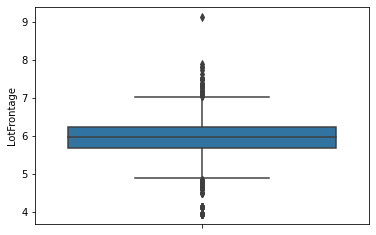

In [51]:
#Lot frontage has some outliers lets visualise it.Lets use boxplot to detect outlier

sns.boxplot(y=all_data.LotFrontage)
plt.show()

In [52]:
#looks like only fewer outliers above value 200

all_data[all_data.LotFrontage > 8]["LotFrontage"].count()

1

In [53]:
#Value
all_data[all_data.LotFrontage > 8]["LotFrontage"]

1051    9.125735
Name: LotFrontage, dtype: float64

In [54]:
#Replace ooutlier with median value which seems more appropriate
all_data['LotFrontage'].replace(9.125735, all_data['LotFrontage'].median(), inplace=True)
all_data.shape

(1458, 80)

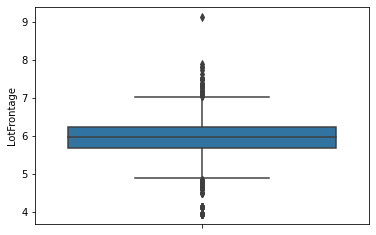

In [55]:
#Validation after outliecr removal

sns.boxplot(y=all_data.LotFrontage)
plt.show()

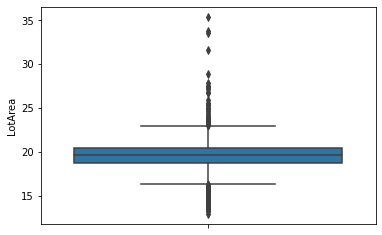

In [56]:
#LotArea
sns.boxplot(y=all_data.LotArea)
plt.show()

In [57]:
#After checking the dataset could see that the prices increase with sale price so that should be fine

In [58]:
#For the grlivarea outlier has already been removed

Getting dummy categorical Features

In [59]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1458, 338)


New Train and test dataset

In [60]:
train = all_data[:ntrain]
test = all_data[ntrain:]

Model Building

In [61]:
import xgboost as xgb
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [62]:
# Cross validate model with Kfold stratified cross val
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)

In [63]:
kf

5

Checking performance of base models by evaluating the cross-validation RMSLE error.



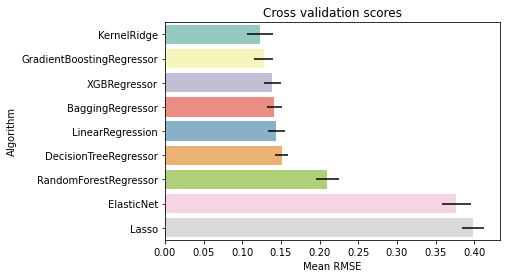

In [64]:
# Modeling differents algorithms. 

random_state = 2
regressor = []

regressor.append(LinearRegression())
regressor.append(KernelRidge())
regressor.append(ElasticNet(random_state=random_state))
regressor.append(Lasso(random_state=random_state))
regressor.append(GradientBoostingRegressor(random_state=random_state))
regressor.append(XGBRegressor(random_state = random_state))

regressor.append(BaggingRegressor(random_state=random_state))
regressor.append(RandomForestRegressor(random_state=random_state))
regressor.append(DecisionTreeRegressor(random_state=random_state))


cv_results = []
for regressor in regressor :
    cv_results.append(np.sqrt(-cross_val_score(regressor, train.values, y = y_train, scoring = "neg_mean_squared_error", 
                                               cv = kf, n_jobs=4)))
    cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LinearRegression",
                                    "KernelRidge",
                                    "ElasticNet",
                                    "Lasso",
                                    "GradientBoostingRegressor",
                                    "XGBRegressor",
                                    "DecisionTreeRegressor",
                                    "BaggingRegressor",
                                    "RandomForestRegressor"
                                    ]})

cv_res = cv_res.sort_values(by = 'CrossValMeans', ascending=True)
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean RMSE")
g = g.set_title("Cross validation scores")

GridSearch for parameter tuning

In [65]:
 KRR = KernelRidge()

KRR_grid = {"alpha" : [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],
                   "kernel" :   ["polynomial"],
                   "degree" : [1,2,3,4,5],
                   "coef0" :[1,1.5,2,2.5,3,3.5,4,4.5,5]
                   }

KRRModel = GridSearchCV(estimator = KRR, param_grid = KRR_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
KRRModel.fit(train,y_train)
KRR_best = KRRModel.best_estimator_
KRRModel.best_params_

Fitting 5 folds for each of 585 candidates, totalling 2925 fits


{'alpha': 0.02, 'coef0': 1, 'degree': 1, 'kernel': 'polynomial'}

GradientBoostingRegressor
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss functio

In [66]:
GBR = GradientBoostingRegressor()

GBR_grid = {"n_estimators" : [2000,3000],
             "learning_rate" :   [0.01,0.1],
             "max_depth" : [3,5],
             "max_features" :['sqrt'],
             "min_samples_leaf" :[10,15],
             "min_samples_split" :[2,5],
             "loss" :['huber']            
             }
 
GBRModel = GridSearchCV(estimator = GBR, param_grid = GBR_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
GBRModel.fit(train,y_train)
GBR_best = GBRModel.best_estimator_
GBRModel.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'learning_rate': 0.01,
 'loss': 'huber',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 3000}

XGBRegressor


In [67]:
XGB = XGBRegressor()

XGB_grid =    {'nthread':[4], 
               'objective':['reg:linear'],
               'learning_rate': [.03, 0.05, .07], 
               'max_depth': [5, 6, 7],
               'min_child_weight': [4],
               'silent': [1],
              'subsample': [0.7],
               'colsample_bytree': [0.7],
              'n_estimators': [500]}
 
XGBModel = GridSearchCV(estimator = XGB, param_grid = XGB_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
XGBModel.fit(train,y_train)
XGB_best = XGBModel.best_estimator_
XGBModel.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[22:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

Decision Tree Regressor

In [69]:
DTR = DecisionTreeRegressor(random_state=0)

DTR_grid =    {"criterion":['mse'],
                "splitter":['best'],
                "max_depth" : [2,3,5,10],
             "max_features" :['sqrt'],
             "min_samples_leaf" :[5,10,15],
             "min_samples_split" :[1,2,5]
               }
 
DTRModel = GridSearchCV(estimator = DTR, param_grid = DTR_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
DTRModel.fit(train,y_train)
DTR_best = DTRModel.best_estimator_
DTRModel.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

Lasso

In [380]:
LARS = Lasso()

LARS_grid = {"alpha" : [1,0.8,0.3,0.2,0.1,0.05,0.005,0.02,0.01],
             "max_iter" :[500,700,1000]          
                  }

LARSModel = GridSearchCV(estimator = LARS, param_grid = LARS_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
LARSModel.fit(train,y_train)
LARS_best = LARSModel.best_estimator_
LARSModel.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'alpha': 0.005, 'max_iter': 500}

In [70]:
#Building base models

In [71]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [72]:
#Build the base models based on GridSearch tuning

KRR = KernelRidge(alpha=0.8, coef0=5, degree=2, gamma=None, kernel='polynomial', kernel_params=None)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, max_iter = 500, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt', min_samples_leaf=10, min_samples_split=5, loss='huber')

model_xgb = xgb.XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=6, min_child_weight=4, n_estimators=500, subsample=0.7, silent=1, random_state =7)

model_DTR = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 2, splitter = 'best' )

LRModel = LinearRegression()

In [73]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_DTR)
print("DT Regression score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(LRModel)
print("Linear Regression score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Kernel Ridge score: 0.1202 (0.0132)

Lasso score: 0.1157 (0.0104)

ElasticNet score: 0.1158 (0.0104)

Gradient Boosting score: 0.1188 (0.0159)

[23:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

In [74]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [75]:
#Averaging the best models to optimize the prediction.

#averaged_models = AveragingModels(models = (KRR, lasso, ENet, GBoost, model_xgb, model_lgb, model_DTR, LRModel))
averaged_models = AveragingModels(models = (KRR, ENet, GBoost, lasso, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[23:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

Final Submission

In [76]:
averaged_models.fit(train.values, y_train)
averaged_models_pred = np.expm1(averaged_models.predict(test.values))

[23:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [77]:
housing_price = pd.DataFrame()
housing_price['Id'] = test_ID
housing_price['SalePrice'] = averaged_models_pred
housing_price.to_csv('finalSubmissionhouse.csv',index=False)